![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Bike store sales

Let's put in practice the topics covered in the course and analyze sales made in a Bike Shop.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv('sales_data.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First look at our data

Analyze what columns we have, what type they are and what data is on them.

In [4]:
sales.shape

(5000, 16)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [7]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [8]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing column types

- Cast `Date` to `datetime`.
- Cast `Customer_Gender`, `Country`, `State`, `Product_Category` and `Sub_Category` to `category`.

In [9]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [10]:
for col in ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']:
    sales[col] = sales[col].astype('category')

In [11]:
sales.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a summary of the main statistics of the whole data

In [13]:
sales.dtypes


Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [14]:
sales['Customer_Age'].mean()

np.float64(35.9338)

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

In [144]:
# # your code goes here
# sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

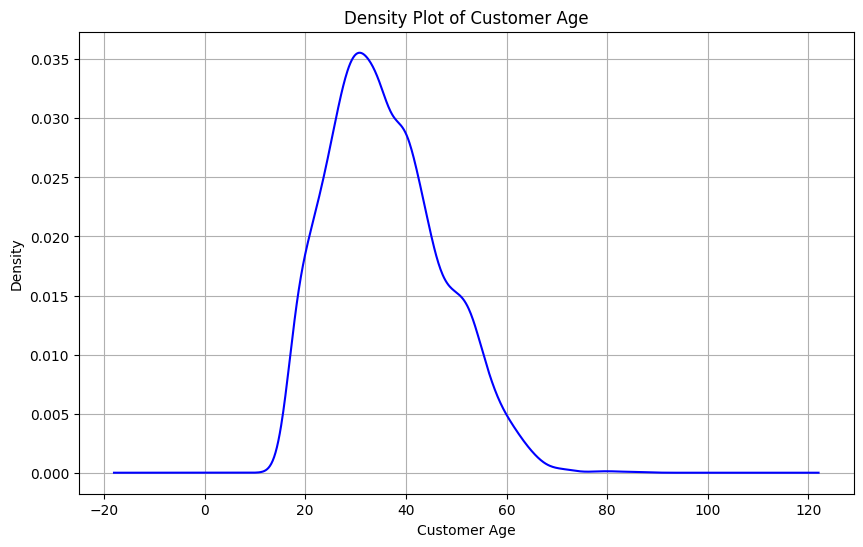

In [146]:
plt.figure(figsize=(10, 6))
sales['Customer_Age'].plot(kind='kde', color='blue')

plt.title('Density Plot of Customer Age', fontsize=12)
plt.xlabel('Customer Age', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.grid(True)
plt.show()

In [148]:
# sales['Customer_Age'].plot(kind='box', vert=False, figsize=(10,6))

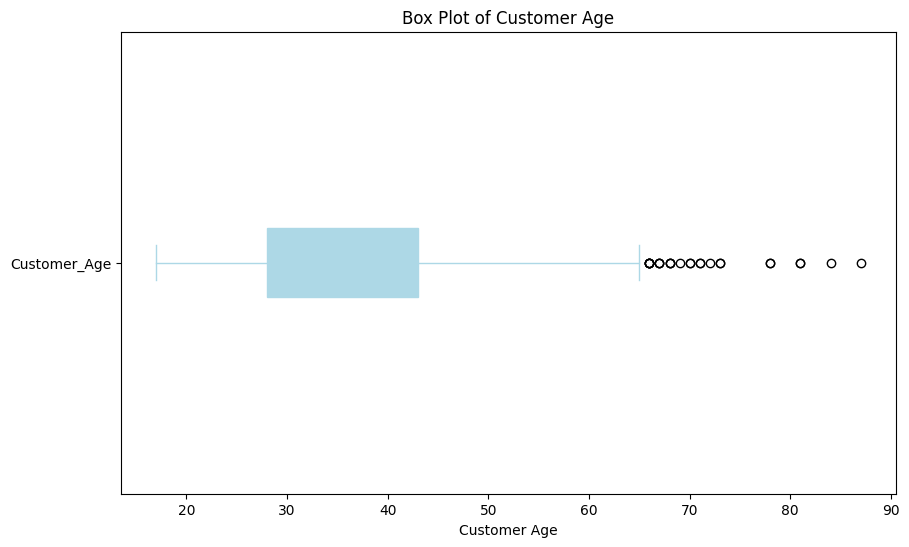

In [149]:
plt.figure(figsize=(10, 6))
sales['Customer_Age'].plot(kind='box', vert=False, color='lightblue', patch_artist=True)

plt.title('Box Plot of Customer Age', fontsize=12)
plt.xlabel('Customer Age', fontsize=10)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [17]:
# your code goes here
sales['Order_Quantity'].mean()

np.float64(11.8204)

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

In [81]:
# # your code goes here
# sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

In [82]:
# sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

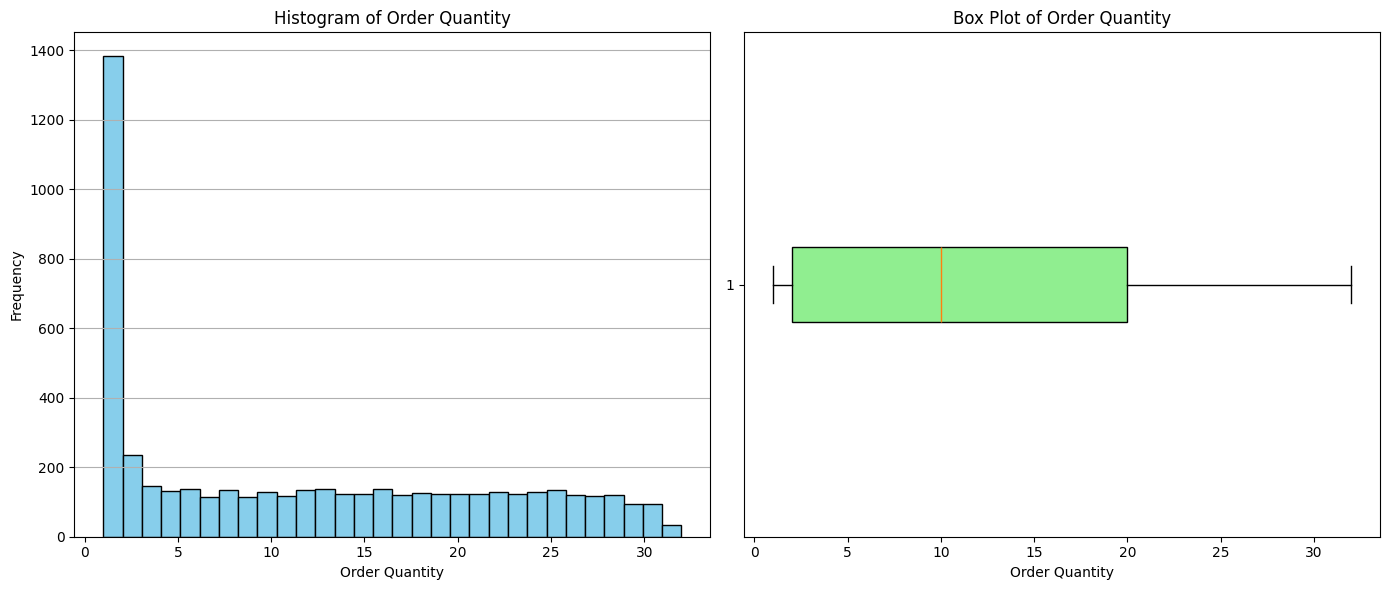

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].hist(sales['Order_Quantity'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Order Quantity', fontsize=12)
axes[0].set_xlabel('Order Quantity', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].grid(axis='y')

axes[1].boxplot(sales['Order_Quantity'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Box Plot of Order Quantity', fontsize=12)
axes[1].set_xlabel('Order Quantity', fontsize=10)

plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### In which countries were sales made?

In [20]:
# your code goes here
sales['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort sales by year

Older sales should be at the bottom.

In [22]:
# your code goes here
sales.sort_values(['Year'],ascending=False, inplace=True)

In [25]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4977,2016-02-10,10,February,2016,35,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,27,55
4972,2016-02-14,14,February,2016,23,F,Australia,Victoria,Accessories,Tires and Tubes,Patch Kit/8 Patches,19,1,2,11,30
6,2016-01-28,28,January,2016,24,M,United Kingdom,England,Accessories,Bottles and Cages,Road Bottle Cage,15,3,9,85,130
4968,2016-05-28,28,May,2016,53,M,Canada,British Columbia,Accessories,Fenders,Fender Set - Mountain,18,8,22,248,392
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Reset the current index

Don't keep the old index.

In [26]:
# your code goes here
sales.reset_index(drop=True, inplace=True)

In [27]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2016-02-10,10,February,2016,35,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,27,55
1,2016-02-14,14,February,2016,23,F,Australia,Victoria,Accessories,Tires and Tubes,Patch Kit/8 Patches,19,1,2,11,30
2,2016-01-28,28,January,2016,24,M,United Kingdom,England,Accessories,Bottles and Cages,Road Bottle Cage,15,3,9,85,130
3,2016-05-28,28,May,2016,53,M,Canada,British Columbia,Accessories,Fenders,Fender Set - Mountain,18,8,22,248,392
4,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [84]:
# your code goes here
year_counts = sales['Year'].value_counts()

Go ahead and show a <b>pie plot</b> and a <b>bar plot</b> with the previous data:

In [88]:
# # your code goes here
# sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

In [87]:
# # your code goes here
# sales['Year'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))

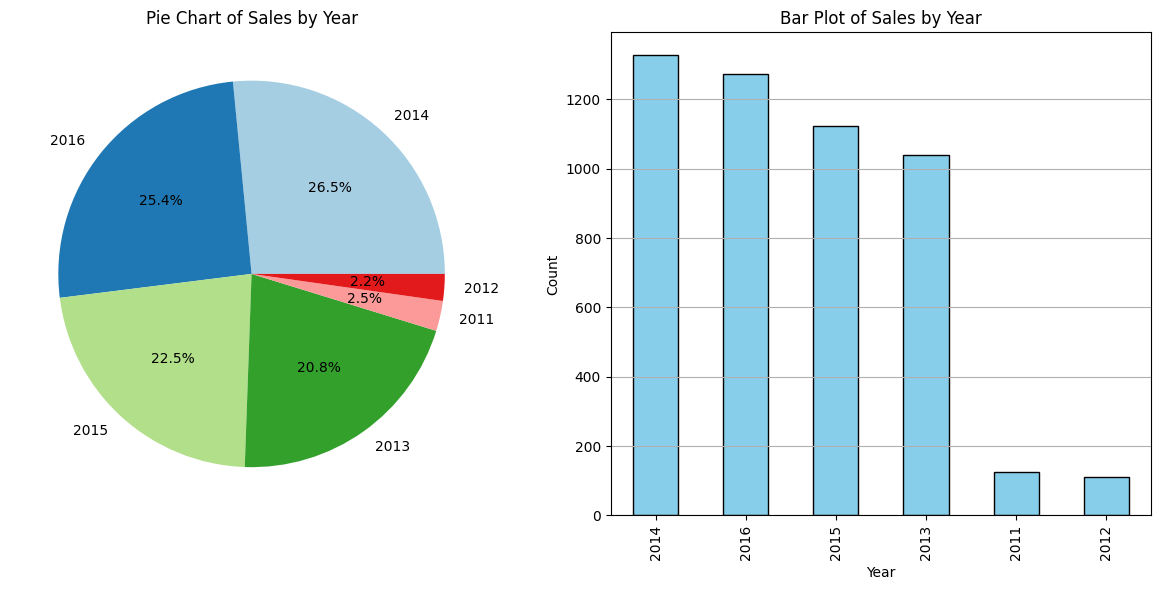

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[0].set_title('Pie Chart of Sales by Year', fontsize=12)

year_counts.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Bar Plot of Sales by Year', fontsize=12)
axes[1].set_xlabel('Year', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `Cost` column

This column should be:
$$ Cost = Unit\_Cost * Order\_Quantity $$

In [31]:
# your code goes here
sales['Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']

sales['Cost']

0         28
1         19
2         45
3        144
4         16
        ... 
4995    1266
4996     344
4997    2171
4998     487
4999    2171
Name: Cost, Length: 5000, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `YearMonth` column

This new `YearMonth` column should be the concatenation of `Year` and `Month` columns, separated by a '-'.

In [32]:
# your code goes here
sales['YearMonth'] = sales['Year'].astype('str') + '-' + sales['Month']

sales['YearMonth']

0       2016-February
1       2016-February
2        2016-January
3            2016-May
4        2016-January
            ...      
4995         2011-May
4996     2011-January
4997      2011-August
4998       2011-April
4999     2011-January
Name: YearMonth, Length: 5000, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Count how many sales we have per `YearMonth`.

In [90]:
# your code goes here
sales['YearMonth'].value_counts()

YearMonth
2015-December    232
2016-April       218
2014-June        215
2013-December    215
2016-May         214
                ... 
2012-December      7
2012-February      6
2011-February      6
2011-June          6
2012-March         4
Name: count, Length: 62, dtype: int64

In [91]:
year_month_counts = sales['YearMonth'].value_counts()

Go ahead and show a <b>bar plot</b> with the previous data:

In [93]:
# # your code goes here
# sales['YearMonth'].value_counts().plot(kind='bar', figsize=(14,6))

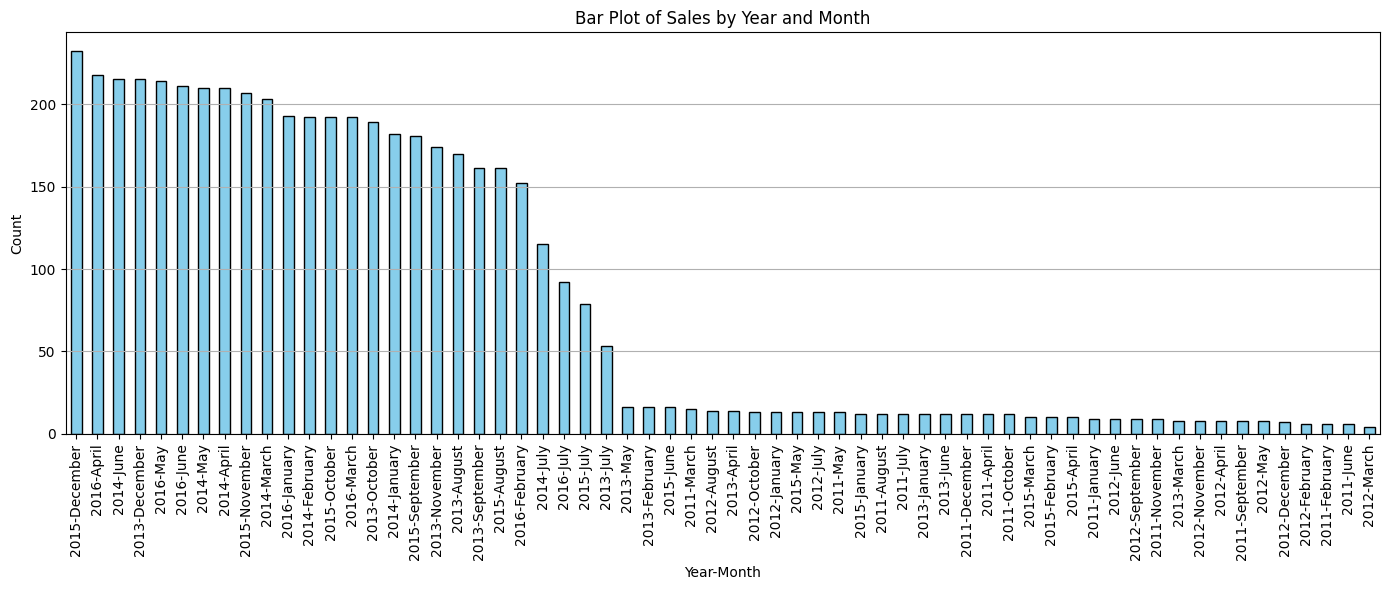

In [155]:
plt.figure(figsize=(14, 6))
year_month_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Bar Plot of Sales by Year and Month', fontsize=12)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [35]:
# your code goes here
sales['Country'].value_counts().head(1)

Country
United States    1700
Name: count, dtype: int64

In [36]:
sales['Country'].value_counts()

Country
United States     1700
Australia         1066
Canada             657
United Kingdom     604
France             489
Germany            484
Name: count, dtype: int64

In [94]:
country_counts = sales['Country'].value_counts()

Go ahead and show a <b>bar plot</b> of the sales per country:

In [96]:
# # your code goes here
# sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

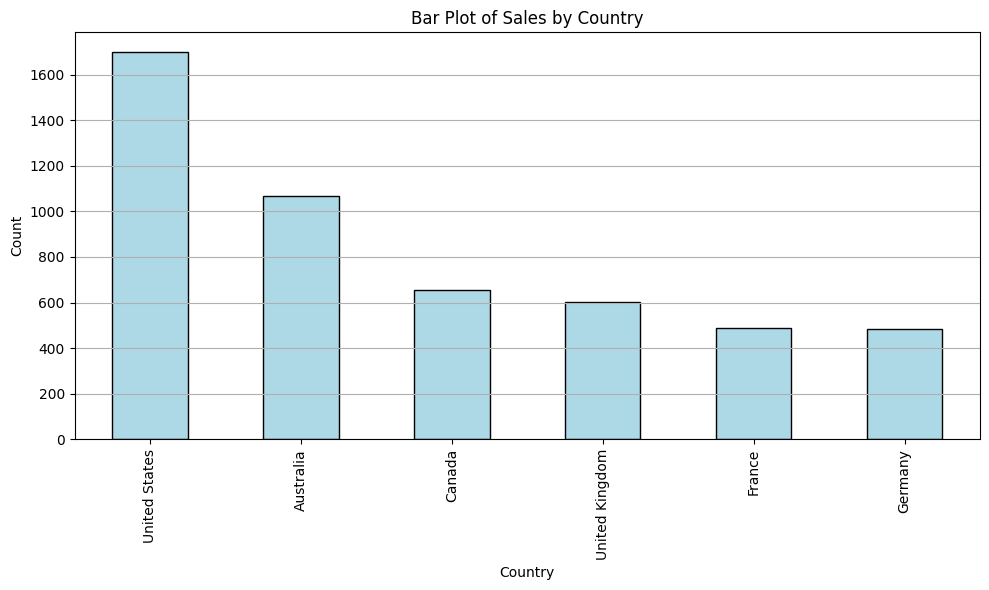

In [156]:
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Bar Plot of Sales by Country', fontsize=12)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a list of every product sold

In [42]:
# your code goes here
sales.loc[:, 'Product'].unique()

array(['Water Bottle - 30 oz.', 'Patch Kit/8 Patches', 'Road Bottle Cage',
       'Fender Set - Mountain', 'AWC Logo Cap', 'Mountain-500 Black, 44',
       'Touring Tire', 'Mountain-200 Silver, 42', 'Touring Tire Tube',
       'ML Mountain Tire', 'Road Tire Tube', 'Sport-100 Helmet, Black',
       'HL Road Tire', 'Sport-100 Helmet, Red', 'Mountain Tire Tube',
       'Long-Sleeve Logo Jersey, M', 'Classic Vest, S',
       'Road-150 Red, 62', 'Classic Vest, L',
       'Long-Sleeve Logo Jersey, S', 'Short-Sleeve Classic Jersey, XL',
       'Road-650 Black, 44', 'Sport-100 Helmet, Blue',
       'Mountain Bottle Cage', "Women's Mountain Shorts, S",
       'Road-250 Red, 48', 'LL Road Tire',
       'Short-Sleeve Classic Jersey, S', 'Touring-3000 Blue, 44',
       "Women's Mountain Shorts, M", 'Short-Sleeve Classic Jersey, M',
       'Bike Wash - Dissolver', 'Touring-3000 Yellow, 50',
       'Road-350-W Yellow, 42', 'Mountain-200 Black, 38',
       'Road-250 Red, 58', 'Road-150 Red, 44', 'Roa

In [97]:
top_products = sales['Product'].value_counts().head(10)

Create a **bar plot** showing the 10 most sold products (best sellers):

In [99]:
# # your code goes here
# sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

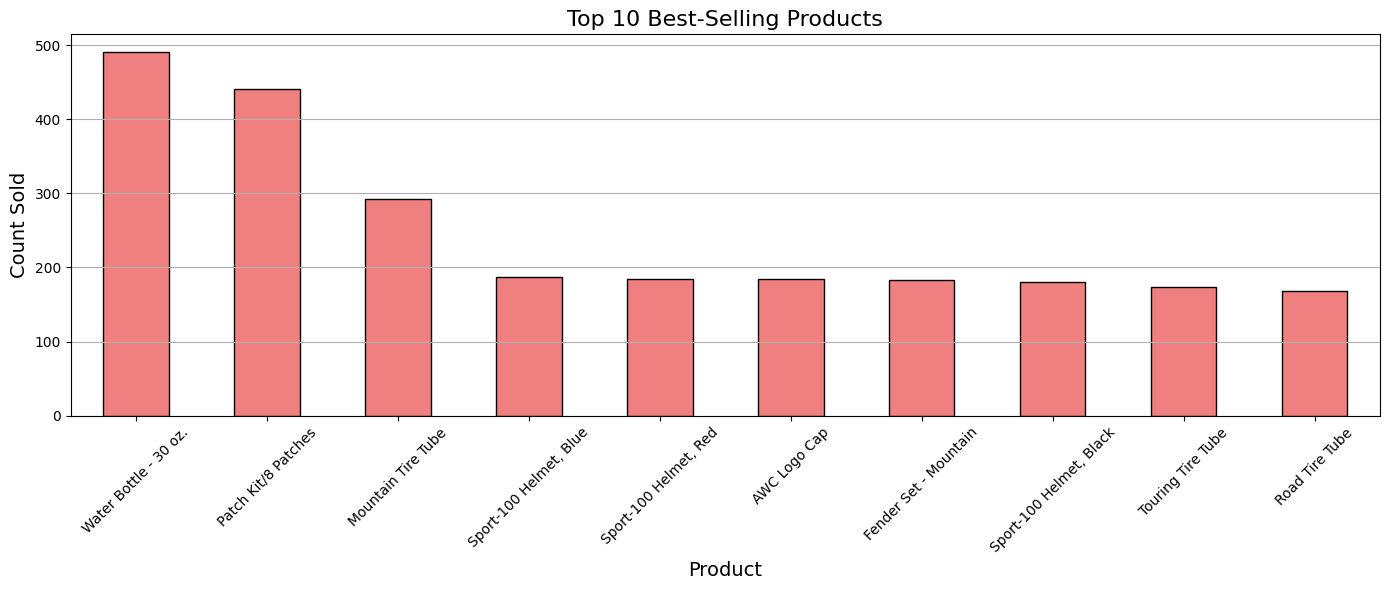

In [158]:
plt.figure(figsize=(14, 6))
top_products.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Count Sold', fontsize=14)

plt.grid(axis='y')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

In [109]:
# # your code goes here
# sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

<Figure size 600x600 with 0 Axes>

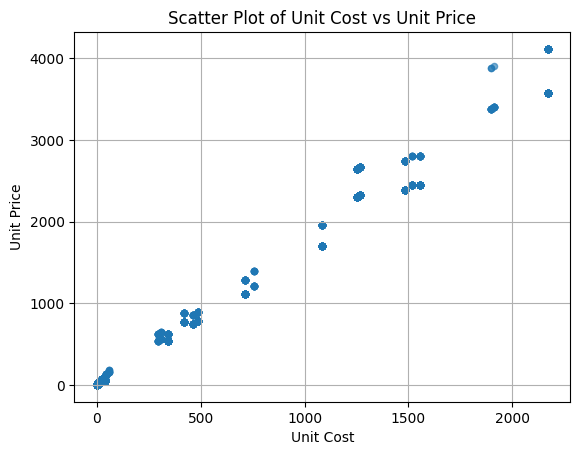

In [108]:
plt.figure(figsize=(6, 6))
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', alpha=0.6)

plt.title('Scatter Plot of Unit Cost vs Unit Price', fontsize=12)
plt.xlabel('Unit Cost', fontsize=10)
plt.ylabel('Unit Price', fontsize=10)
plt.grid(True)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

In [114]:
# # your code goes here
# sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

<Figure size 600x600 with 0 Axes>

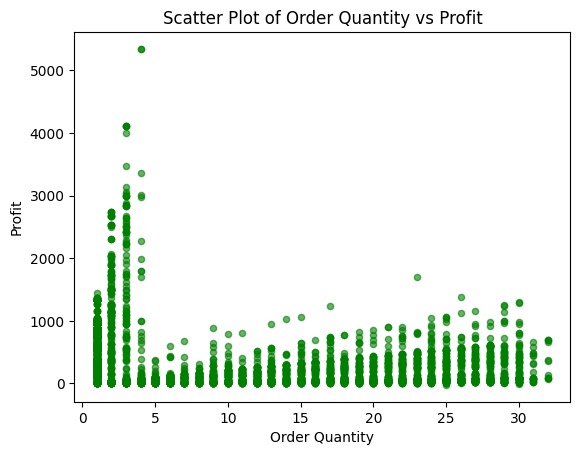

In [113]:
plt.figure(figsize=(6, 6))
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', color='green', alpha=0.6)

plt.title('Scatter Plot of Order Quantity vs Profit', fontsize=12)
plt.xlabel('Order Quantity', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

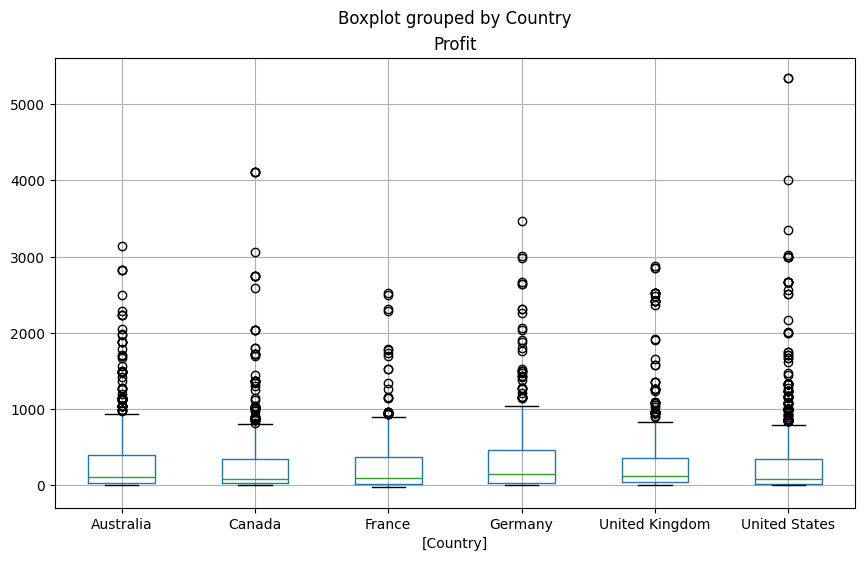

In [46]:
# your code goes here
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

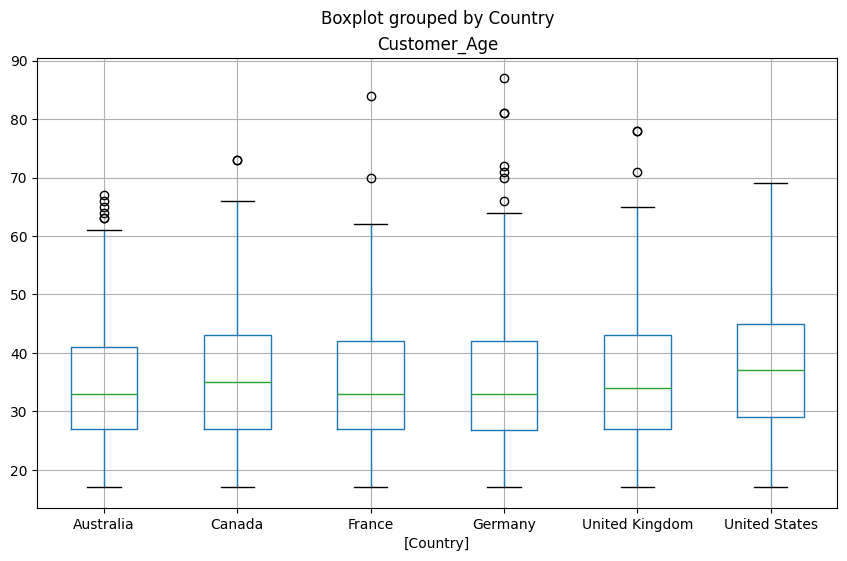

In [47]:
# your code goes here
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [48]:
# your code goes here
sales['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [49]:
# your code goes here
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

1146

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [50]:
# your code goes here
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

3

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [51]:
# your code goes here
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

State
Seine (Paris)          101
Seine Saint Denis       87
Nord                    76
Yveline                 48
Hauts de Seine          41
Essonne                 40
Seine et Marne          16
Moselle                 16
Loiret                  13
Val d'Oise              11
Charente-Maritime       10
Garonne (Haute)         10
Pas de Calais            6
Val de Marne             5
Loir et Cher             5
Somme                    4
England                  0
California               0
Brandenburg              0
British Columbia         0
Bayern                   0
Alberta                  0
Hamburg                  0
Georgia                  0
Oregon                   0
Ohio                     0
Nordrhein-Westfalen      0
New York                 0
Missouri                 0
New South Wales          0
Kentucky                 0
Hessen                   0
South Australia          0
Saarland                 0
Queensland               0
Tasmania                 0
Utah                  

Go ahead and show a <b>bar plot</b> with the results:

<Axes: xlabel='State'>

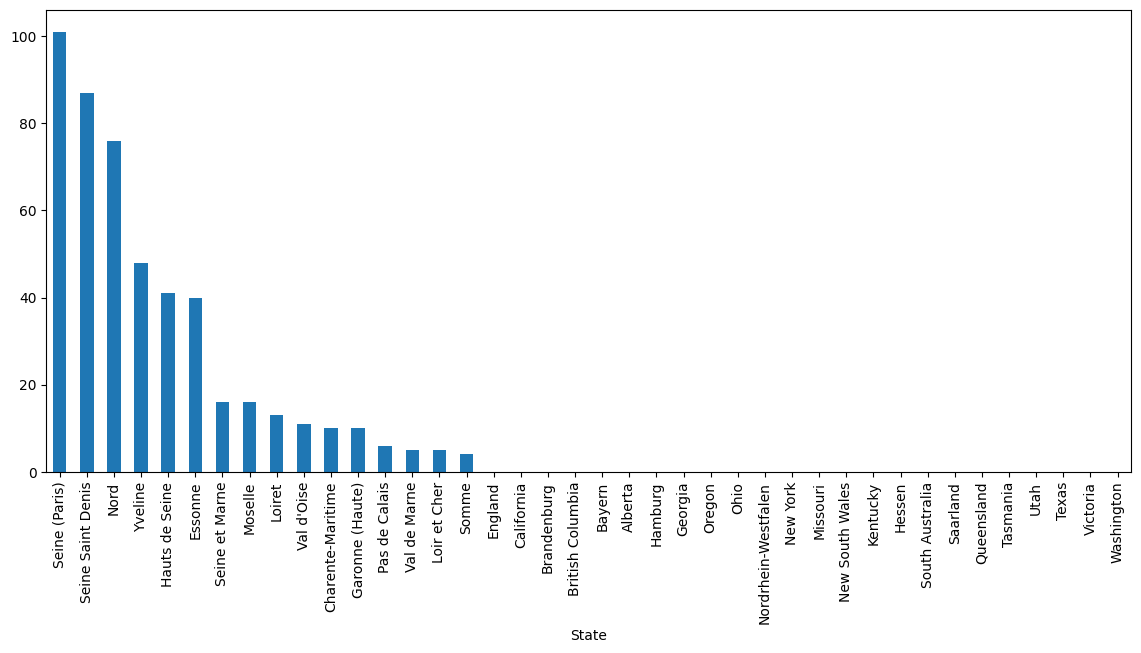

In [52]:
# your code goes here
france_states.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [53]:
# your code goes here
sales['Product_Category'].value_counts()

Product_Category
Accessories    3090
Bikes          1166
Clothing        744
Name: count, dtype: int64

In [115]:
category_counts = sales['Product_Category'].value_counts()

Go ahead and show a <b>pie plot</b> with the results:

In [117]:
# sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

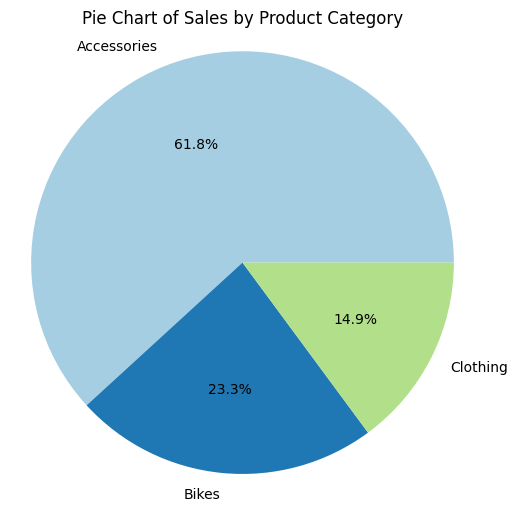

In [118]:
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Sales by Product Category', fontsize=12)

plt.axis('equal')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [55]:
# your code goes here
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Sub_Category
Tires and Tubes      1458
Bottles and Cages     719
Helmets               553
Fenders               183
Cleaners               78
Hydration Packs        64
Bike Racks             26
Bike Stands             9
Caps                    0
Gloves                  0
Jerseys                 0
Road Bikes              0
Mountain Bikes          0
Shorts                  0
Socks                   0
Touring Bikes           0
Vests                   0
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

In [122]:
# your code goes here
# accessories.plot(kind='bar', figsize=(14,6))

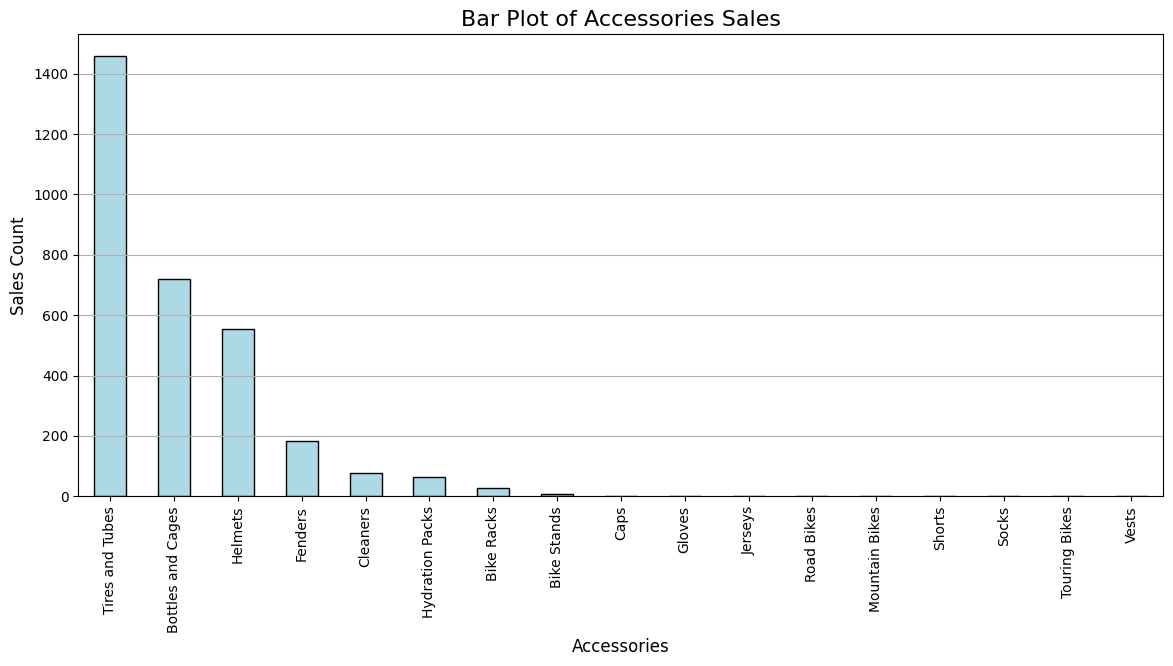

In [121]:
plt.figure(figsize=(14, 6))
accessories.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Bar Plot of Accessories Sales', fontsize=16)
plt.xlabel('Accessories', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)

plt.grid(axis='y')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [57]:
# your code goes here
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Sub_Category
Road Bikes           600
Mountain Bikes       391
Touring Bikes        175
Bike Racks             0
Bike Stands            0
Fenders                0
Bottles and Cages      0
Caps                   0
Cleaners               0
Hydration Packs        0
Helmets                0
Gloves                 0
Jerseys                0
Shorts                 0
Socks                  0
Tires and Tubes        0
Vests                  0
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<Axes: ylabel='count'>

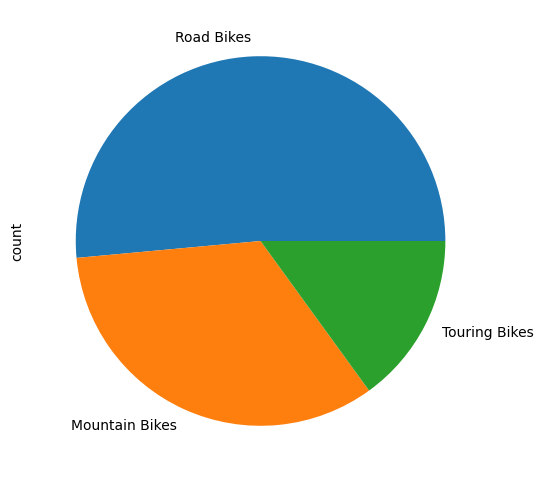

In [58]:
# your code goes here

bikes.plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [59]:
# your code goes here
sales['Customer_Gender'].value_counts()

Customer_Gender
M    2564
F    2436
Name: count, dtype: int64

In [128]:
gender_counts = sales['Customer_Gender'].value_counts()

In [143]:
# sales['Customer_Gender'].value_counts().plot(kind='bar')

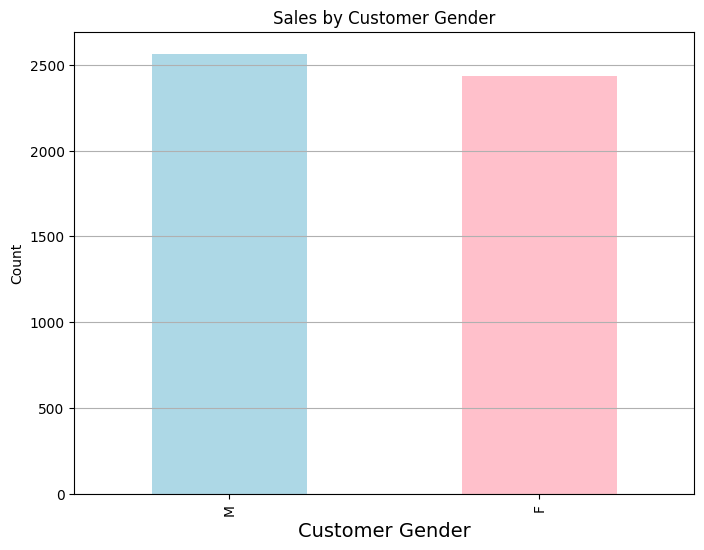

In [140]:
colors = ['lightblue', 'Pink'] 
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=colors)

plt.title('Sales by Customer Gender', fontsize=12)
plt.xlabel('Customer Gender', fontsize=14)
plt.ylabel('Count', fontsize=10)

plt.grid(axis='y')

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [62]:
# your code goes here
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

1

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [64]:
# your code goes here
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4944,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011-March
4914,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January
387,2016-01-28,28,January,2016,34,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2016-January
899,2016-01-09,9,January,2016,40,F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 52",3,2171,3578,4114,10677,6513,2016-January
2142,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2015-December


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [65]:
# your code goes here
cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4914,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January
4944,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011-March


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [66]:
# your code goes here

cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

np.float64(3.25)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [67]:
# your code goes here
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

np.float64(11.834134615384615)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [68]:
# your code goes here
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

214

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [69]:
# your code goes here
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

517

Show a grouped <b>box plot</b> per month with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

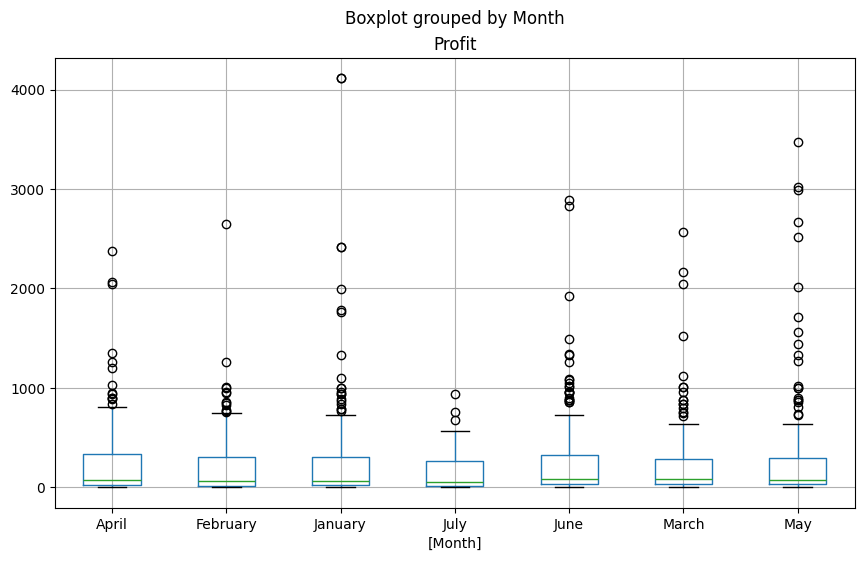

In [141]:
# your code goes here
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [72]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072


In [73]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
0,2016-02-10,10,February,2016,35,F,Australia,Victoria,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5.0,27,105,28,2016-February
1,2016-02-14,14,February,2016,23,F,Australia,Victoria,Accessories,Tires and Tubes,Patch Kit/8 Patches,19,1,2.0,11,80,19,2016-February
2,2016-01-28,28,January,2016,24,M,United Kingdom,England,Accessories,Bottles and Cages,Road Bottle Cage,15,3,9.0,85,180,45,2016-January
3,2016-05-28,28,May,2016,53,M,Canada,British Columbia,Accessories,Fenders,Fender Set - Mountain,18,8,22.0,248,442,144,2016-May
4,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2.0,16,82,16,2016-January


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)